In [8]:
import numpy as np
from  Functions import *
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
%matplotlib inline
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [9]:
#There are many possibe ways to generate random float. In this solution numpy.random.uniform was used 
#Functions names:
#['sphere', 'ackley', 'rastrigin', 'rosenbrock', 'griewank', 'schwefel', 'levy', 'micha','zakhar']

In [10]:
#algorithm of quicksorting for evaluatino of the best neighbor
def quicksort(x_rnd, func_name):
    func = func_dic[func_name][0] #define function
    if len(x_rnd) < 2:  #define basic case
        return x_rnd
    else:
        pivot = x_rnd[0] #shoce pivot from all possible solutions of x
        less = [i for i in x_rnd[1:] if func(i) < func(pivot)] #sorting by more optimal and less optimal solutions
        greater = [i for i in x_rnd[1:] if func(i) > func(pivot)]
        return quicksort(less, func_name) + [pivot] + quicksort(greater, func_name) #repeat function 

In [11]:
#generate a plot with function and with optimal points 
def make_plt(data):
    
    x1_opt = [data[1][i][0] for i in range(len(data[1]))] #extract data 
    x2_opt = [data[1][i][1] for i in range(len(data[1]))]
    z_opt = data[0]
    func_name = data[2]
    
    func = func_dic[func_name][0]    #choose function
    low_lim = func_dic[func_name][1][0]  #find limits
    high_lim = func_dic[func_name][1][1]

    x1 = np.linspace(low_lim, high_lim, 100) #generate coordinates for ploting func
    x2 = np.linspace(low_lim, high_lim, 100)

    xx1, xx2 = np.meshgrid(x1, x2, sparse=True) #grid of coordinates, result - shape1 = (1, 100), shape2 = (100, 1)
    z = np.empty([xx1.shape[1], xx2.shape[0]]) #empty matrix (100, 100)

    for i in range(xx2.shape[0]): #filling z matrix using preprepared functins. ?????? can be better solution
        for j in range(xx1.shape[1]):
            z[i, j] = func([xx1[:, j][0] , xx2[i][0]])

    ax = plt.axes(projection='3d') #create 3D template
    ax.scatter3D(x1_opt, x2_opt, z_opt, color = "red") #plotting optimal points
    ax.plot_surface(xx1, xx2, z, cmap='ocean', alpha = 0.3) #plotting function

In [34]:
#function for creating animation of optimisation process
def make_animation(data):
    
    x1_opt = [data[1][i][0] for i in range(len(data[1]))] #extract data
    x2_opt = [data[1][i][1] for i in range(len(data[1]))]
    z_opt = data[0]
    func_name = data[2]

    func = func_dic[func_name][0]    #choose function
    low_lim = func_dic[func_name][1][0]  #find limits
    high_lim = func_dic[func_name][1][1]

    fig = plt.figure() #define figure
    ax = fig.add_subplot(111, projection='3d')
    camera = Camera(fig) #use simple library from github

    x1 = np.linspace(low_lim, high_lim, 100) #generate coordinates for ploting func
    x2 = np.linspace(low_lim, high_lim, 100)

    xx1, xx2 = np.meshgrid(x1, x2, sparse=True) #grid of coordinates, result - shape1 = (1, 100), shape2 = (100, 1)
    z = np.empty([xx1.shape[1], xx2.shape[0]]) #empty matrix (100, 100)

    for i in range(xx2.shape[0]): #filling z matrix using preprepared functins. ?????? can be better solution
        for j in range(xx1.shape[1]):
            z[i, j] = func([xx1[:, j][0] , xx2[i][0]])

    for i in range(len(data[0])): #generate a sequence of snapshots

        ax.plot_wireframe(xx1, xx2, z, cmap='ocean') #plotting function
        ax.scatter3D(x1_opt[i], x2_opt[i], z_opt[i], color = "red") #plotting optimal points
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        ax.set_zlim(0, 100)

        camera.snap() 

    animation = camera.animate() #make an animation from snapshots
    return HTML(animation.to_html5_video()) 

In [35]:
#Algorithm uses number of iterations, but it can also use some tolerance to determine convergence 
# k - is number of neighbours 

def hill_climb(func_name = 'sphere', dimension = 2, std = 0.1, n_iter = 100, k = 1): 
    
    func = func_dic[func_name][0]    #choose function
    low_lim = func_dic[func_name][1][0]  #find limits
    high_lim = func_dic[func_name][1][1]
       
    x_rnd = np.random.uniform(low_lim, high_lim, dimension) #generate initial random vector of x
    best_value = func(x_rnd) #iniciate best value
    
    all_best_x = [list(x_rnd)]
    all_best_value = [best_value]
    
    if k < 1:
        return print('Number of neighbours must be greater then zero')
    
        
    while n_iter:  #make a loop for a number of iterations
        n_iter -= 1 #decremental variable
        mu = x_rnd  #define mu according to the algorithm rules
        x_rnd = np.random.normal(mu, std, (k, dimension))  #generate 2D normaly destributed array 
        x_rnd_best = quicksort(x_rnd, func_name)[0] #sort possible solutions and choose optimal one
            
        temp_value = func(x_rnd_best) #calculate function value at x
        
        if temp_value < best_value: #compere calculated value with best one
            best_value = temp_value #save new best value and best vector x
            best_x = x_rnd_best
            
            all_best_x.append(list(best_x)) #save all best values for x anf f(x)
            all_best_value.append(best_value)
    
    return [all_best_value, all_best_x, func_name, [best_value, best_x]]

Best value: 0.0009102945025790786, Optimal solution: [0.02876075 0.00911668]


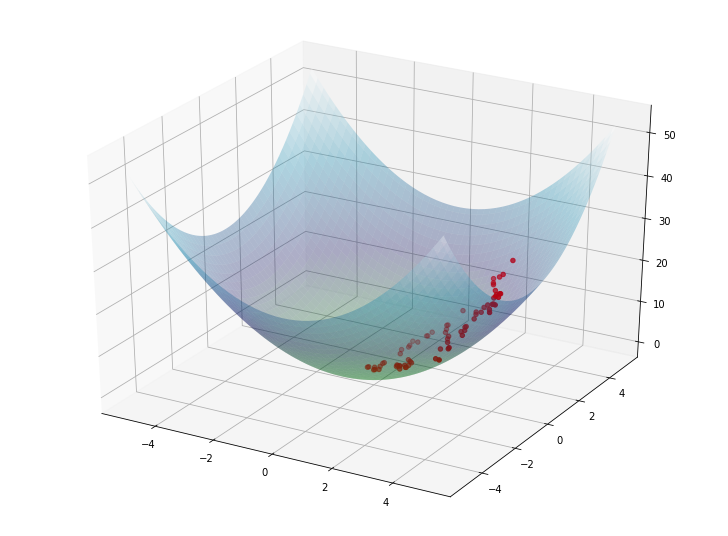

In [49]:
data = hill_climb(func_name = 'sphere', k = 10, std = 0.1, n_iter = 1000)
make_plt(data)
print('Best value: {}, Optimal solution: {}'.format(data[3][0], data[3][1]) )

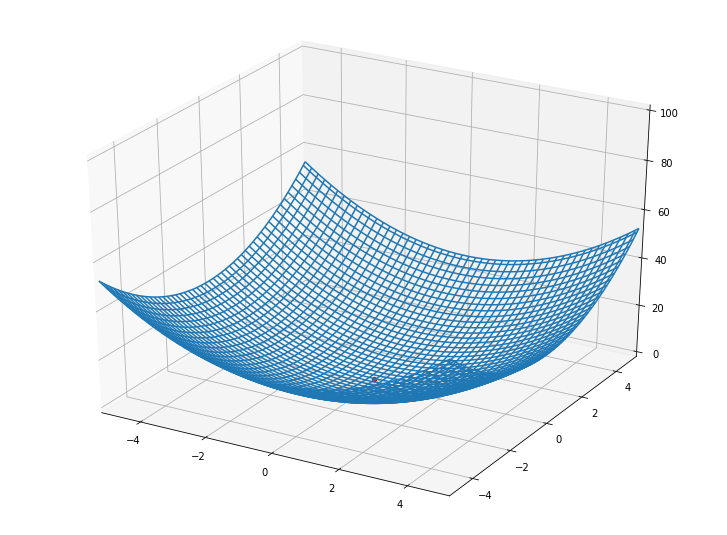

In [50]:
make_animation(data)